# Importing all required libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
matplotlib.rcParams["figure.figsize"] = (20,10)
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
from sklearn.metrics import mean_squared_error
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score

In [2]:
df = pd.read_csv("F:\PGDDS\PGD_Data_Science\csv_data\Bengaluru_House_Data.csv")

In [3]:
df.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [4]:
df.shape

(13320, 9)

In [5]:
df.columns

Index(['area_type', 'availability', 'location', 'size', 'society',
       'total_sqft', 'bath', 'balcony', 'price'],
      dtype='object')

In [6]:
df['area_type'].unique()

array(['Super built-up  Area', 'Plot  Area', 'Built-up  Area',
       'Carpet  Area'], dtype=object)

In [7]:
df['area_type'].value_counts()

Super built-up  Area    8790
Built-up  Area          2418
Plot  Area              2025
Carpet  Area              87
Name: area_type, dtype: int64

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area_type     13320 non-null  object 
 1   availability  13320 non-null  object 
 2   location      13319 non-null  object 
 3   size          13304 non-null  object 
 4   society       7818 non-null   object 
 5   total_sqft    13320 non-null  object 
 6   bath          13247 non-null  float64
 7   balcony       12711 non-null  float64
 8   price         13320 non-null  float64
dtypes: float64(3), object(6)
memory usage: 936.7+ KB


In [9]:
df.isnull().sum()

area_type          0
availability       0
location           1
size              16
society         5502
total_sqft         0
bath              73
balcony          609
price              0
dtype: int64

# Drop features that are not required to build our model

In [10]:
df.drop(['area_type', 'availability', 'society','balcony'], axis = 1, inplace = True)

In [11]:
df.head()

,location,size,total_sqft,bath,price
0,Electronic City Phase II,2 BHK,1056,2.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00
2,Uttarahalli,3 BHK,1440,2.0,62.00
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00
4,Kothanur,2 BHK,1200,2.0,51.00


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   location    13319 non-null  object 
 1   size        13304 non-null  object 
 2   total_sqft  13320 non-null  object 
 3   bath        13247 non-null  float64
 4   price       13320 non-null  float64
dtypes: float64(2), object(3)
memory usage: 520.4+ KB


# Data Cleaning: Handle NA values

In [13]:
df.isnull().sum()

location       1
size          16
total_sqft     0
bath          73
price          0
dtype: int64

In [14]:
df.dropna(inplace = True)

In [15]:
df.isnull().sum()

location      0
size          0
total_sqft    0
bath          0
price         0
dtype: int64

In [16]:
df.head()

,location,size,total_sqft,bath,price
0,Electronic City Phase II,2 BHK,1056,2.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00
2,Uttarahalli,3 BHK,1440,2.0,62.00
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00
4,Kothanur,2 BHK,1200,2.0,51.00


In [17]:
df['size'].unique()

array(['2 BHK', '4 Bedroom', '3 BHK', '4 BHK', '6 Bedroom', '3 Bedroom',
       '1 BHK', '1 RK', '1 Bedroom', '8 Bedroom', '2 Bedroom',
       '7 Bedroom', '5 BHK', '7 BHK', '6 BHK', '5 Bedroom', '11 BHK',
       '9 BHK', '9 Bedroom', '27 BHK', '10 Bedroom', '11 Bedroom',
       '10 BHK', '19 BHK', '16 BHK', '43 Bedroom', '14 BHK', '8 BHK',
       '12 Bedroom', '13 BHK', '18 Bedroom'], dtype=object)

In [18]:
df['bhk'] = df['size'].apply(lambda x : int(x.split(' ')[0]))

In [19]:
df.head()

,location,size,total_sqft,bath,price,bhk
0,Electronic City Phase II,2 BHK,1056,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00,4
2,Uttarahalli,3 BHK,1440,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00,3
4,Kothanur,2 BHK,1200,2.0,51.00,2


In [20]:
df1 = df.drop('size', axis = 1)

In [21]:
df1.head()

,location,total_sqft,bath,price,bhk
0,Electronic City Phase II,1056,2.0,39.07,2
1,Chikka Tirupathi,2600,5.0,120.00,4
2,Uttarahalli,1440,2.0,62.00,3
3,Lingadheeranahalli,1521,3.0,95.00,3
4,Kothanur,1200,2.0,51.00,2


In [22]:
df['bhk'].unique()

array([ 2,  4,  3,  6,  1,  8,  7,  5, 11,  9, 27, 10, 19, 16, 43, 14, 12,
       13, 18], dtype=int64)

# Explore total_sqft feature

In [23]:
df['total_sqft'].unique()

array(['1056', '2600', '1440', ..., '1133 - 1384', '774', '4689'],
      dtype=object)

In [24]:
def is_float(x):
    try:
        float(x)
    except:
        return False
    return True

In [25]:
df1[df1['total_sqft'].apply(is_float)]

,location,total_sqft,bath,price,bhk
0,Electronic City Phase II,1056,2.0,39.07,2
1,Chikka Tirupathi,2600,5.0,120.00,4
2,Uttarahalli,1440,2.0,62.00,3
3,Lingadheeranahalli,1521,3.0,95.00,3
4,Kothanur,1200,2.0,51.00,2
...,...,...,...,...,...
13315,Whitefield,3453,4.0,231.00,5
13316,Richards Town,3600,5.0,400.00,4
13317,Raja Rajeshwari Nagar,1141,2.0,60.00,2
13318,Padmanabhanagar,4689,4.0,488.00,4


In [26]:
df1.shape

(13246, 5)

In [27]:
df1[~df1['total_sqft'].apply(is_float)]

,location,total_sqft,bath,price,bhk
30,Yelahanka,2100 - 2850,4.0,186.000,4
122,Hebbal,3067 - 8156,4.0,477.000,4
137,8th Phase JP Nagar,1042 - 1105,2.0,54.005,2
165,Sarjapur,1145 - 1340,2.0,43.490,2
188,KR Puram,1015 - 1540,2.0,56.800,2
...,...,...,...,...,...
12975,Whitefield,850 - 1060,2.0,38.190,2
12990,Talaghattapura,1804 - 2273,3.0,122.000,3
13059,Harlur,1200 - 1470,2.0,72.760,2
13265,Hoodi,1133 - 1384,2.0,59.135,2


In [28]:
df1[~df1['total_sqft'].apply(is_float)].head(12)

,location,total_sqft,bath,price,bhk
30,Yelahanka,2100 - 2850,4.0,186.000,4
122,Hebbal,3067 - 8156,4.0,477.000,4
137,8th Phase JP Nagar,1042 - 1105,2.0,54.005,2
165,Sarjapur,1145 - 1340,2.0,43.490,2
188,KR Puram,1015 - 1540,2.0,56.800,2
410,Kengeri,34.46Sq. Meter,1.0,18.500,1
549,Hennur Road,1195 - 1440,2.0,63.770,2
648,Arekere,4125Perch,9.0,265.000,9
661,Yelahanka,1120 - 1145,2.0,48.130,2
672,Bettahalsoor,3090 - 5002,4.0,445.000,4


In [29]:
def convert(x):
    l = x.split(' - ')
    if len(l) == 2:
        return(float(l[0]) + (float(l[1])) / 2)
    try:
        return float(x)
    except:
        return None

In [30]:
df2 = df1.copy()

In [31]:
df2.head()

,location,total_sqft,bath,price,bhk
0,Electronic City Phase II,1056,2.0,39.07,2
1,Chikka Tirupathi,2600,5.0,120.00,4
2,Uttarahalli,1440,2.0,62.00,3
3,Lingadheeranahalli,1521,3.0,95.00,3
4,Kothanur,1200,2.0,51.00,2


In [32]:
df2['total_sqft'] = df2['total_sqft'].apply(convert)

In [33]:
df2.shape

(13246, 5)

In [34]:
df2.isnull().sum()

location       0
total_sqft    46
bath           0
price          0
bhk            0
dtype: int64

In [35]:
df2 = df2[df2.total_sqft.notnull()]


In [36]:
df2.shape

(13200, 5)

In [37]:
df2.head()

,location,total_sqft,bath,price,bhk
0,Electronic City Phase II,1056.0,2.0,39.07,2
1,Chikka Tirupathi,2600.0,5.0,120.00,4
2,Uttarahalli,1440.0,2.0,62.00,3
3,Lingadheeranahalli,1521.0,3.0,95.00,3
4,Kothanur,1200.0,2.0,51.00,2


In [391]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13200 entries, 0 to 13319
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   location    13200 non-null  object 
 1   total_sqft  13200 non-null  float64
 2   bath        13200 non-null  float64
 3   price       13200 non-null  float64
 4   bhk         13200 non-null  int64  
dtypes: float64(3), int64(1), object(1)
memory usage: 618.8+ KB


In [392]:
df2.isnull().sum()

location      0
total_sqft    0
bath          0
price         0
bhk           0
dtype: int64

For below row, it shows total_sqft as 2475 which is an average of the range 2100-2850

In [393]:
df2.loc[30]

location      Yelahanka
total_sqft   3525.00000
bath            4.00000
price         186.00000
bhk                   4
Name: 30, dtype: object

In [394]:
(2100+2850)/2

2475.0

# Feature Engineering

Add new feature called price per square feet

In [395]:
df2['price_per_sqft'] = (df2['price']*100000)/df2['total_sqft']

In [396]:
df2.head()

,location,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,1056.00000,2.00000,39.07000,2,3699.81061
1,Chikka Tirupathi,2600.00000,5.00000,120.00000,4,4615.38462
2,Uttarahalli,1440.00000,2.00000,62.00000,3,4305.55556
3,Lingadheeranahalli,1521.00000,3.00000,95.00000,3,6245.89086
4,Kothanur,1200.00000,2.00000,51.00000,2,4250.00000


In [397]:
df2.describe()

,total_sqft,bath,price,bhk,price_per_sqft
count,13200.00000,13200.00000,13200.00000,13200.00000,13200.00000
mean,1563.46677,2.69114,112.27618,2.80083,7903.58229
std,1246.45155,1.33892,149.17600,1.29284,106727.69113
min,1.00000,1.00000,8.00000,1.00000,267.82981
25%,1100.00000,2.00000,50.00000,2.00000,4237.91822
50%,1277.00000,2.00000,71.85000,3.00000,5417.54502
75%,1680.00000,3.00000,120.00000,3.00000,7307.88617
max,52272.00000,40.00000,3600.00000,43.00000,12000000.00000


In [398]:
pd.set_option('display.float_format', lambda x: '%.5f' % x)

In [399]:
df2.describe()

,total_sqft,bath,price,bhk,price_per_sqft
count,13200.00000,13200.00000,13200.00000,13200.00000,13200.00000
mean,1563.46677,2.69114,112.27618,2.80083,7903.58229
std,1246.45155,1.33892,149.17600,1.29284,106727.69113
min,1.00000,1.00000,8.00000,1.00000,267.82981
25%,1100.00000,2.00000,50.00000,2.00000,4237.91822
50%,1277.00000,2.00000,71.85000,3.00000,5417.54502
75%,1680.00000,3.00000,120.00000,3.00000,7307.88617
max,52272.00000,40.00000,3600.00000,43.00000,12000000.00000


In [400]:
#pd.reset_option('display.float_format')

In [401]:
df2.describe()

,total_sqft,bath,price,bhk,price_per_sqft
count,13200.00000,13200.00000,13200.00000,13200.00000,13200.00000
mean,1563.46677,2.69114,112.27618,2.80083,7903.58229
std,1246.45155,1.33892,149.17600,1.29284,106727.69113
min,1.00000,1.00000,8.00000,1.00000,267.82981
25%,1100.00000,2.00000,50.00000,2.00000,4237.91822
50%,1277.00000,2.00000,71.85000,3.00000,5417.54502
75%,1680.00000,3.00000,120.00000,3.00000,7307.88617
max,52272.00000,40.00000,3600.00000,43.00000,12000000.00000


In [402]:
df2['price_per_sqft'] = (df2['price']*100000)/df2['total_sqft']

In [403]:
df2.head()

,location,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,1056.00000,2.00000,39.07000,2,3699.81061
1,Chikka Tirupathi,2600.00000,5.00000,120.00000,4,4615.38462
2,Uttarahalli,1440.00000,2.00000,62.00000,3,4305.55556
3,Lingadheeranahalli,1521.00000,3.00000,95.00000,3,6245.89086
4,Kothanur,1200.00000,2.00000,51.00000,2,4250.00000


In [404]:
df2.describe()

,total_sqft,bath,price,bhk,price_per_sqft
count,13200.00000,13200.00000,13200.00000,13200.00000,13200.00000
mean,1563.46677,2.69114,112.27618,2.80083,7903.58229
std,1246.45155,1.33892,149.17600,1.29284,106727.69113
min,1.00000,1.00000,8.00000,1.00000,267.82981
25%,1100.00000,2.00000,50.00000,2.00000,4237.91822
50%,1277.00000,2.00000,71.85000,3.00000,5417.54502
75%,1680.00000,3.00000,120.00000,3.00000,7307.88617
max,52272.00000,40.00000,3600.00000,43.00000,12000000.00000


xamine locations which is a categorical variable. We need to apply dimensionality reduction technique here to reduce number of locations

In [405]:
df2.location.unique()

array(['Electronic City Phase II', 'Chikka Tirupathi', 'Uttarahalli', ...,
       '12th cross srinivas nagar banshankari 3rd stage',
       'Havanur extension', 'Abshot Layout'], dtype=object)

In [406]:
len(df2.location.unique())

1298

In [407]:
df2['location'] = df2['location'].apply(lambda x :str(x))

In [408]:
df2['location'] = df2['location'].apply(lambda x : x.strip())

In [409]:
df2.groupby('location')['location'].value_counts()

location                                         location                                       
1 Annasandrapalya                                1 Annasandrapalya                                  1
1 Giri Nagar                                     1 Giri Nagar                                       1
1 Immadihalli                                    1 Immadihalli                                      1
1 Ramamurthy Nagar                               1 Ramamurthy Nagar                                 1
12th cross srinivas nagar banshankari 3rd stage  12th cross srinivas nagar banshankari 3rd stage    1
                                                                                                   ..
t.c palya                                        t.c palya                                          1
tc.palya                                         tc.palya                                           4
vinayakanagar                                    vinayakanagar                         

In [410]:
location_stats = df2.groupby('location')['location'].agg('count').sort_values(ascending = False)
location_stats

location
Whitefield               533
Sarjapur  Road           392
Electronic City          304
Kanakpura Road           264
Thanisandra              235
                        ... 
1 Giri Nagar               1
Kanakapura Road,           1
Kanakapura main  Road      1
Kannur                     1
whitefiled                 1
Name: location, Length: 1287, dtype: int64

In [411]:
location_stats.values.sum()

13200

In [412]:
len(location_stats[location_stats>10])

240

In [413]:
len(location_stats)

1287

In [414]:
len(location_stats[location_stats <= 10])

1047

Any location having less than 10 data points should be tagged as "other" location. This way number of categories can be reduced by huge amount. Later on when we do one hot encoding, it will help us with having fewer dummy columns

In [415]:
less_than_10 = location_stats[location_stats <= 10]

In [416]:
less_than_10

location
Sadashiva Nagar          10
Naganathapura            10
Basapura                 10
Nagadevanahalli          10
Kalkere                  10
                         ..
1 Giri Nagar              1
Kanakapura Road,          1
Kanakapura main  Road     1
Kannur                    1
whitefiled                1
Name: location, Length: 1047, dtype: int64

In [417]:
len(less_than_10)

1047

In [418]:
len(df2.location.unique())

1287

In [419]:
df2['location']

0        Electronic City Phase II
1                Chikka Tirupathi
2                     Uttarahalli
3              Lingadheeranahalli
4                        Kothanur
                   ...           
13315                  Whitefield
13316               Richards Town
13317       Raja Rajeshwari Nagar
13318             Padmanabhanagar
13319                Doddathoguru
Name: location, Length: 13200, dtype: object

In [420]:
df2['location'] = df2['location'].apply(lambda x : 'Others' if x in less_than_10 else x)

In [421]:
df2['location']

0        Electronic City Phase II
1                Chikka Tirupathi
2                     Uttarahalli
3              Lingadheeranahalli
4                        Kothanur
                   ...           
13315                  Whitefield
13316                      Others
13317       Raja Rajeshwari Nagar
13318             Padmanabhanagar
13319                Doddathoguru
Name: location, Length: 13200, dtype: object

In [422]:
len(df2.location.unique())

241

In [423]:
df2.head(10)

,location,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,1056.00000,2.00000,39.07000,2,3699.81061
1,Chikka Tirupathi,2600.00000,5.00000,120.00000,4,4615.38462
2,Uttarahalli,1440.00000,2.00000,62.00000,3,4305.55556
3,Lingadheeranahalli,1521.00000,3.00000,95.00000,3,6245.89086
4,Kothanur,1200.00000,2.00000,51.00000,2,4250.00000
5,Whitefield,1170.00000,2.00000,38.00000,2,3247.86325
6,Old Airport Road,2732.00000,4.00000,204.00000,4,7467.05710
7,Rajaji Nagar,3300.00000,4.00000,600.00000,4,18181.81818
8,Marathahalli,1310.00000,3.00000,63.25000,3,4828.24427
9,Others,1020.00000,6.00000,370.00000,6,36274.50980


In [424]:
df2.groupby('location')['location'].agg('count').sort_values(ascending = False)

location
Others                       2872
Whitefield                    533
Sarjapur  Road                392
Electronic City               304
Kanakpura Road                264
                             ... 
Doddaballapur                  11
2nd Phase Judicial Layout      11
Narayanapura                   11
Nehru Nagar                    11
Bommenahalli                   11
Name: location, Length: 241, dtype: int64

In [425]:
df2.describe()

,total_sqft,bath,price,bhk,price_per_sqft
count,13200.00000,13200.00000,13200.00000,13200.00000,13200.00000
mean,1563.46677,2.69114,112.27618,2.80083,7903.58229
std,1246.45155,1.33892,149.17600,1.29284,106727.69113
min,1.00000,1.00000,8.00000,1.00000,267.82981
25%,1100.00000,2.00000,50.00000,2.00000,4237.91822
50%,1277.00000,2.00000,71.85000,3.00000,5417.54502
75%,1680.00000,3.00000,120.00000,3.00000,7307.88617
max,52272.00000,40.00000,3600.00000,43.00000,12000000.00000


In [426]:
df2.head()

,location,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,1056.00000,2.00000,39.07000,2,3699.81061
1,Chikka Tirupathi,2600.00000,5.00000,120.00000,4,4615.38462
2,Uttarahalli,1440.00000,2.00000,62.00000,3,4305.55556
3,Lingadheeranahalli,1521.00000,3.00000,95.00000,3,6245.89086
4,Kothanur,1200.00000,2.00000,51.00000,2,4250.00000


# Outlier Removal Using Business Logic

In [427]:
df2[df2.total_sqft/ df2.bhk <300]

,location,total_sqft,bath,price,bhk,price_per_sqft
9,Others,1020.00000,6.00000,370.00000,6,36274.50980
45,HSR Layout,600.00000,9.00000,200.00000,8,33333.33333
58,Murugeshpalya,1407.00000,4.00000,150.00000,6,10660.98081
68,Devarachikkanahalli,1350.00000,7.00000,85.00000,8,6296.29630
70,Others,500.00000,3.00000,100.00000,3,20000.00000
...,...,...,...,...,...,...
13277,Others,1400.00000,7.00000,218.00000,7,15571.42857
13279,Others,1200.00000,5.00000,130.00000,6,10833.33333
13281,Margondanahalli,1375.00000,5.00000,125.00000,5,9090.90909
13303,Vidyaranyapura,774.00000,5.00000,70.00000,5,9043.92765


In [428]:
df3 = df2[~(df2.total_sqft/ df2.bhk <300)]

In [429]:
df3.head()

,location,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,1056.00000,2.00000,39.07000,2,3699.81061
1,Chikka Tirupathi,2600.00000,5.00000,120.00000,4,4615.38462
2,Uttarahalli,1440.00000,2.00000,62.00000,3,4305.55556
3,Lingadheeranahalli,1521.00000,3.00000,95.00000,3,6245.89086
4,Kothanur,1200.00000,2.00000,51.00000,2,4250.00000


In [430]:
df3.describe()

,total_sqft,bath,price,bhk,price_per_sqft
count,12456.00000,12456.00000,12456.00000,12456.00000,12456.00000
mean,1598.84155,2.56278,111.18796,2.64900,6290.29998
std,1269.66090,1.08027,152.20337,0.97605,4175.61921
min,300.00000,1.00000,9.00000,1.00000,267.82981
25%,1118.00000,2.00000,49.00000,2.00000,4186.72584
50%,1300.00000,2.00000,70.00000,3.00000,5281.69014
75%,1702.25000,3.00000,115.00000,3.00000,6904.65201
max,52272.00000,16.00000,3600.00000,16.00000,176470.58824


In [431]:
df3.price_per_sqft.describe()

count    12456.00000
mean      6290.29998
std       4175.61921
min        267.82981
25%       4186.72584
50%       5281.69014
75%       6904.65201
max     176470.58824
Name: price_per_sqft, dtype: float64

Here we find that min price per sqft is 267 rs/sqft whereas max is 176470, this shows a wide variation in property prices. We should remove outliers per location using mean and one standard deviation

In [432]:
df3.shape

(12456, 6)

In [433]:
def remove_pps_outliers(df):
    df_out = pd.DataFrame()
    for keys, subdf in df.groupby('location'):
        m = np.mean(subdf.price_per_sqft)
        s = np.std(subdf.price_per_sqft)
        reduced_df = subdf[(subdf.price_per_sqft > (m-s)) & (subdf.price_per_sqft < (m+s))]
        df_out = pd.concat([df_out, reduced_df], ignore_index = True)
    return df_out

In [434]:
df4 = remove_pps_outliers(df3)

In [435]:
df4.head()

,location,total_sqft,bath,price,bhk,price_per_sqft
0,1st Block Jayanagar,2850.00000,4.00000,428.00000,4,15017.54386
1,1st Block Jayanagar,1630.00000,3.00000,194.00000,3,11901.84049
2,1st Block Jayanagar,1875.00000,2.00000,235.00000,3,12533.33333
3,1st Block Jayanagar,1200.00000,2.00000,130.00000,3,10833.33333
4,1st Block Jayanagar,1235.00000,2.00000,148.00000,2,11983.80567


In [436]:
df4.shape

(10232, 6)

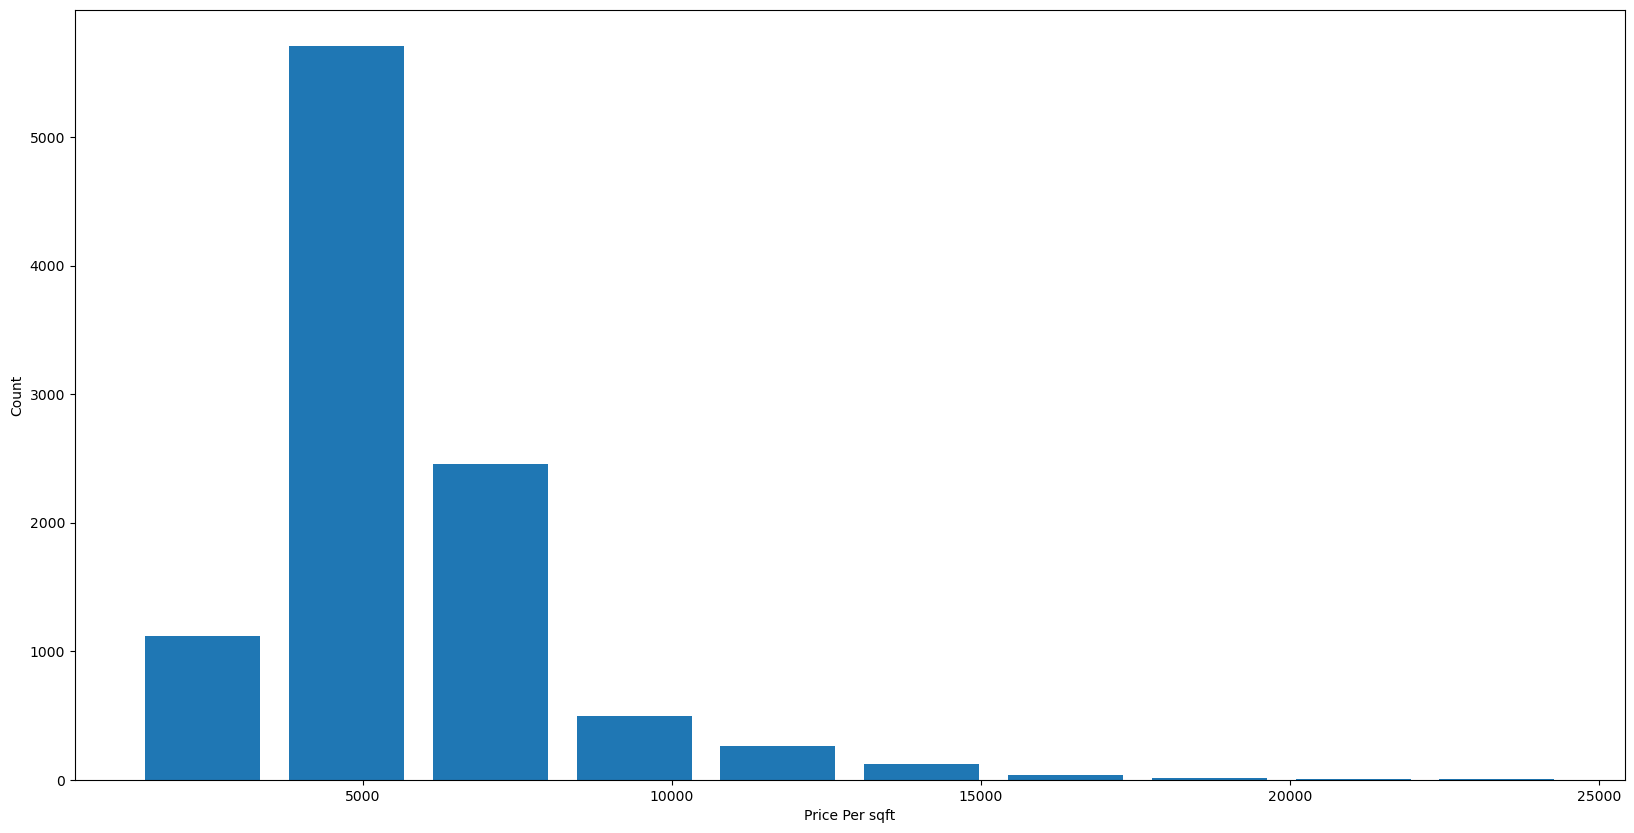

In [437]:
matplotlib.rcParams['figure.figsize'] = (20,10)
plt.hist(df4.price_per_sqft, rwidth = 0.8)
plt.xlabel("Price Per sqft")
plt.ylabel("Count")
plt.show()

Let's check if for a given location how does the 2 BHK and 3 BHK property prices look like

In [438]:
def plot_scatter_plot(df, location):
    bhk2 = df[(df.location == location) & (df.bhk == 2)]
    bhk3 = df[(df.location == location) & (df.bhk == 3)]
    matplotlib.rcParams['figure.figsize'] = (15, 10)
    plt.scatter(bhk2.total_sqft, bhk2.price, color = 'Blue', label = '2BHK')
    plt.scatter(bhk3.total_sqft, bhk3.price, color = 'green', label = '3BHK', marker = '*')
    plt.xlabel('Total Sqft Feet Area')
    plt.ylabel('Price')
    plt.title('Location')
    plt.legend()
    

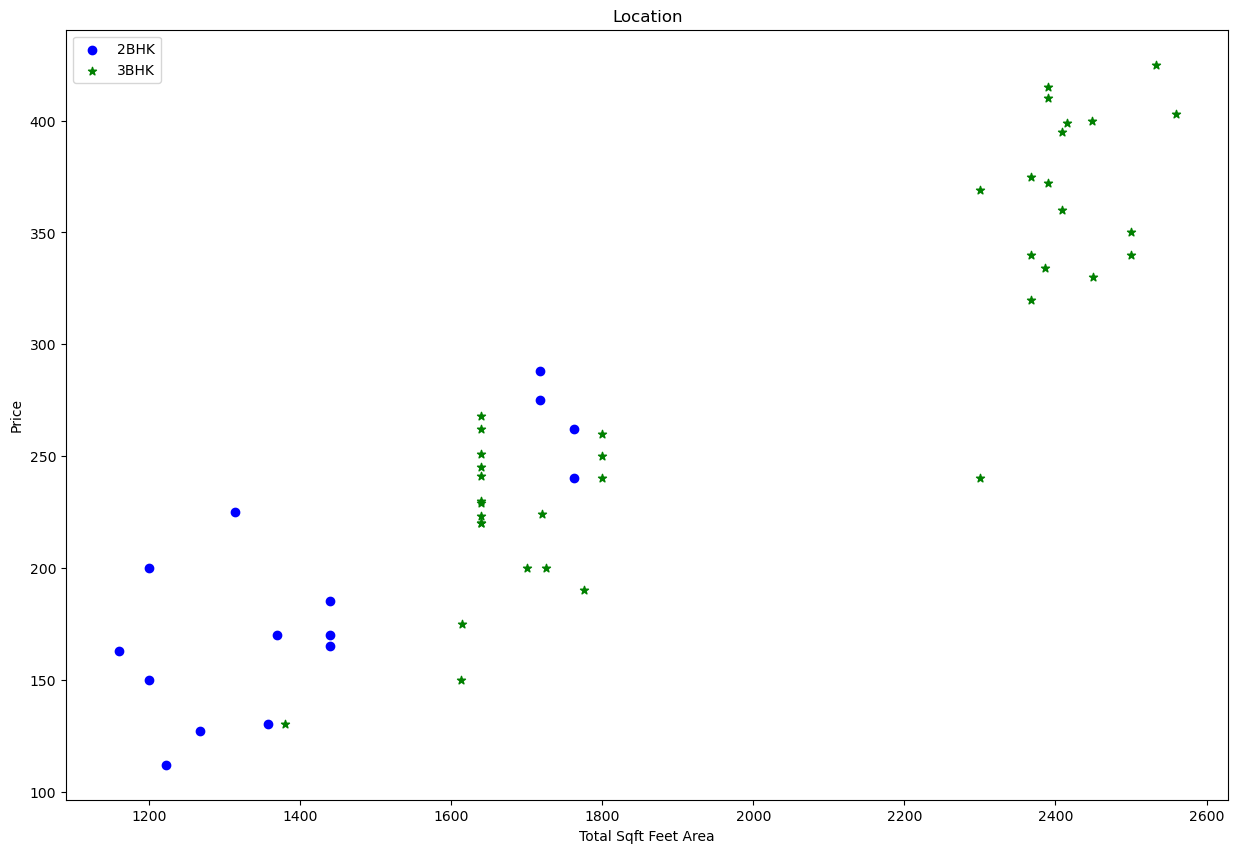

In [439]:
plot_scatter_plot(df4, 'Rajaji Nagar')

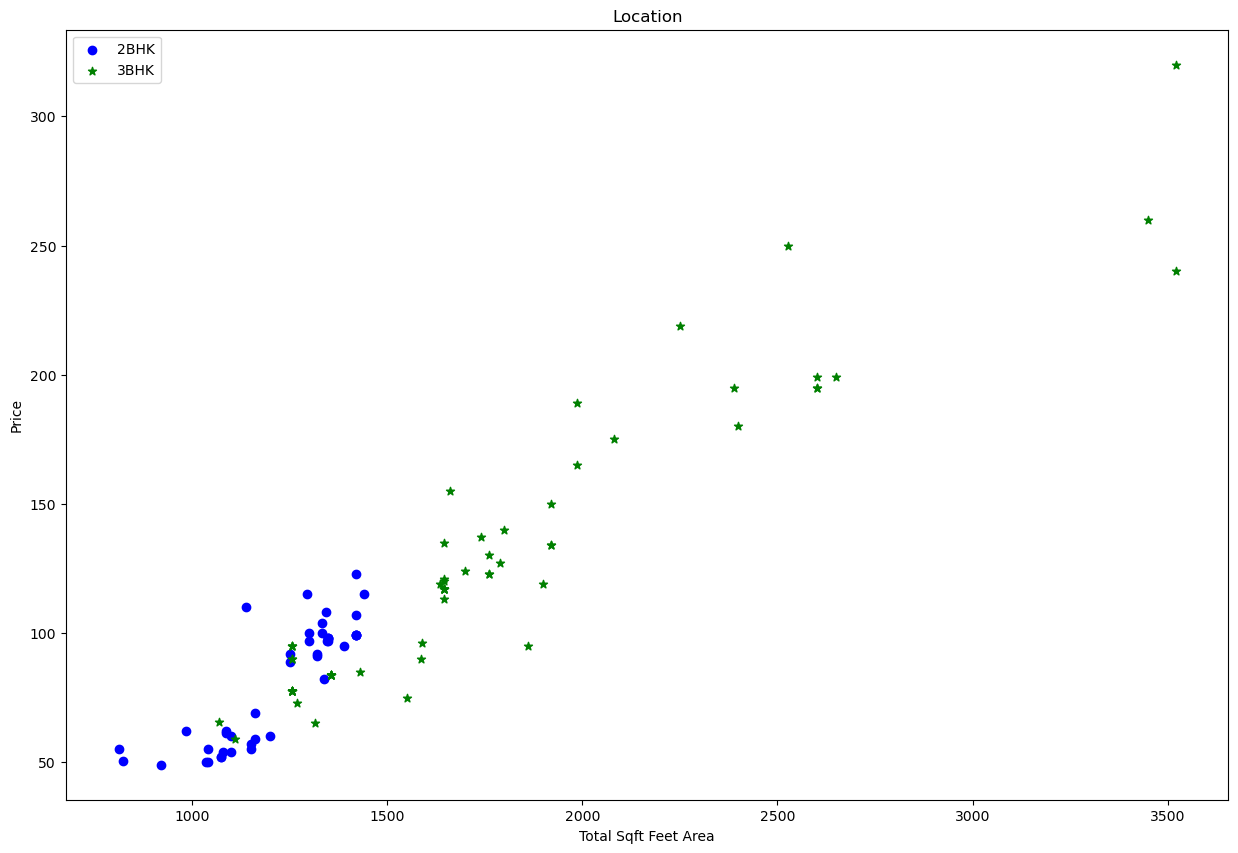

In [440]:
plot_scatter_plot(df4,"Hebbal")

# Outlier Removal Using Bathrooms Feature

In [441]:
df4.bath.unique()

array([ 4.,  3.,  2.,  5.,  8.,  1.,  6.,  7.,  9., 12., 16., 13.])

Text(0, 0.5, 'Count')

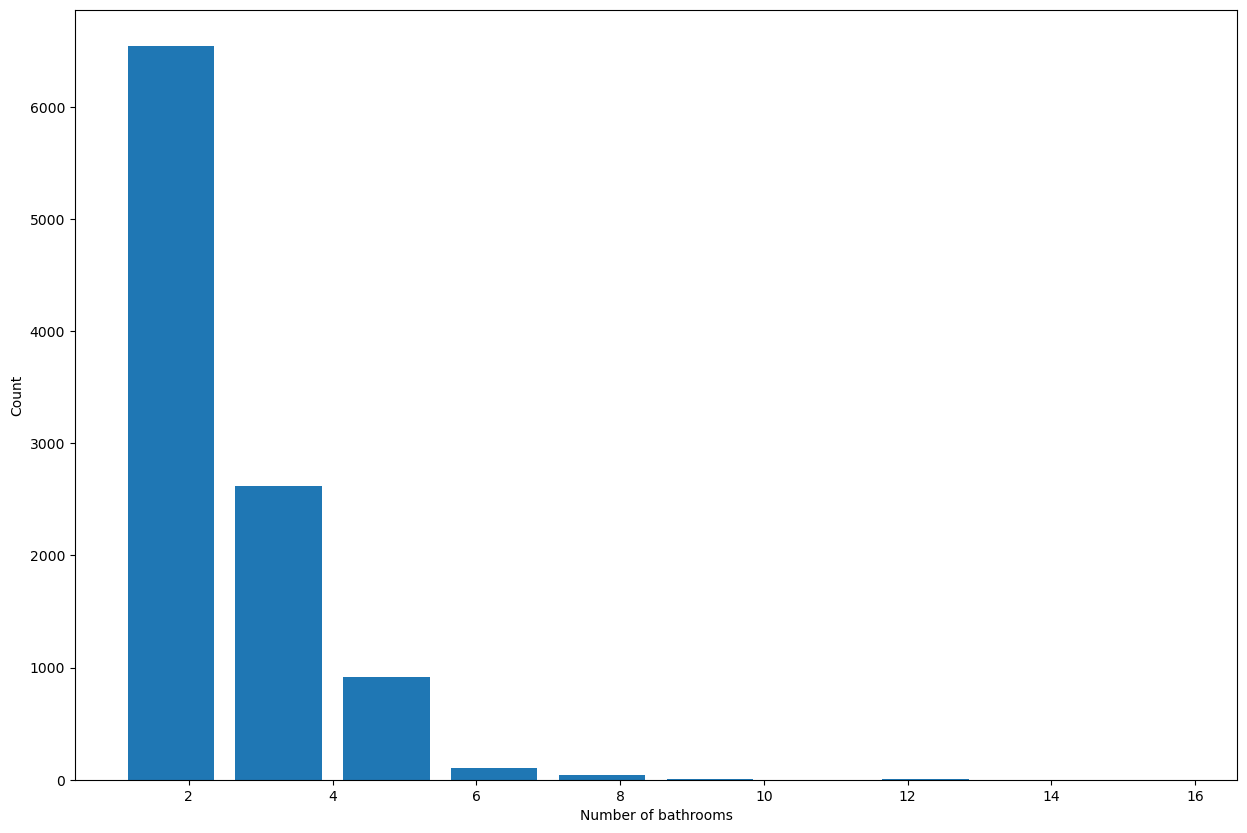

In [442]:
plt.hist(df4.bath,rwidth=0.8)
plt.xlabel("Number of bathrooms")
plt.ylabel("Count")

In [443]:
df4[df4.bath>10]

,location,total_sqft,bath,price,bhk,price_per_sqft
5273,Neeladri Nagar,4000.00000,12.00000,160.00000,10,4000.00000
5921,Others,12000.00000,12.00000,525.00000,10,4375.00000
6010,Others,10000.00000,16.00000,550.00000,16,5500.00000
6744,Others,6000.00000,12.00000,150.00000,11,2500.00000
7075,Others,5425.00000,13.00000,275.00000,13,5069.12442


In [444]:
df4[df4.bath > df4.bhk + 2] 

,location,total_sqft,bath,price,bhk,price_per_sqft
1625,Chikkabanavar,2460.00000,7.00000,80.00000,4,3252.03252
5234,Nagasandra,7000.00000,8.00000,450.00000,4,6428.57143
5846,Others,11338.00000,9.00000,1000.00000,6,8819.89769
9011,Thanisandra,1806.00000,6.00000,116.00000,3,6423.03433


In [445]:
df5 = df4[df4.bath <= df4.bhk + 2] 

In [446]:
df5.head()

,location,total_sqft,bath,price,bhk,price_per_sqft
0,1st Block Jayanagar,2850.00000,4.00000,428.00000,4,15017.54386
1,1st Block Jayanagar,1630.00000,3.00000,194.00000,3,11901.84049
2,1st Block Jayanagar,1875.00000,2.00000,235.00000,3,12533.33333
3,1st Block Jayanagar,1200.00000,2.00000,130.00000,3,10833.33333
4,1st Block Jayanagar,1235.00000,2.00000,148.00000,2,11983.80567


In [447]:
df5.shape

(10228, 6)

In [448]:
def remove_bhk_outliers(df):
    exclude_indice = np.array([])
    for location, location_df in df.groupby('location'):
        bhk_stats = {}
        
    for bhk, bhk_df in location_df.groupby('bhk'):
        bhk_stats[bhk] = {
            'mean' : np.mean(bhk_df.price_per_sqft),
            'std' : np.std(bhk_df.price_per_sqft),
            'count' : bhk_df.shape[0]
        }
        
    for bhk, bhk_df in location_df.groupby('bhk'):
        stats = bhk_stats.get(bhk - 1)
        if stats and stats['count'] > 5:
            exclude_indice = np.append(exclude_indice, bhk_df[bhk_df.price_per_sqft < (stats['mean'])].index.values)
    return df.drop(exclude_indice, axis = 'index')

In [449]:
remove_bhk_outliers(df5)

,location,total_sqft,bath,price,bhk,price_per_sqft
0,1st Block Jayanagar,2850.00000,4.00000,428.00000,4,15017.54386
1,1st Block Jayanagar,1630.00000,3.00000,194.00000,3,11901.84049
2,1st Block Jayanagar,1875.00000,2.00000,235.00000,3,12533.33333
3,1st Block Jayanagar,1200.00000,2.00000,130.00000,3,10833.33333
4,1st Block Jayanagar,1235.00000,2.00000,148.00000,2,11983.80567
...,...,...,...,...,...,...
10222,Yeshwanthpur,1692.00000,3.00000,108.00000,3,6382.97872
10224,Yeshwanthpur,2500.00000,5.00000,185.00000,6,7400.00000
10226,Yeshwanthpur,1160.00000,2.00000,64.08000,2,5524.13793
10229,Yeshwanthpur,1855.00000,3.00000,135.00000,3,7277.62803


In [450]:
df5.drop('price_per_sqft', axis = 1, inplace = True)

In [451]:
df5.head()

,location,total_sqft,bath,price,bhk
0,1st Block Jayanagar,2850.00000,4.00000,428.00000,4
1,1st Block Jayanagar,1630.00000,3.00000,194.00000,3
2,1st Block Jayanagar,1875.00000,2.00000,235.00000,3
3,1st Block Jayanagar,1200.00000,2.00000,130.00000,3
4,1st Block Jayanagar,1235.00000,2.00000,148.00000,2


# Use One Hot Encoding For Location

In [452]:
final = pd.get_dummies(data = df5, columns=['location'], drop_first=True)

In [453]:
final.head()

,total_sqft,bath,price,bhk,location_1st Phase JP Nagar,location_2nd Phase Judicial Layout,location_2nd Stage Nagarbhavi,location_5th Block Hbr Layout,location_5th Phase JP Nagar,location_6th Phase JP Nagar,...,location_Vijayanagar,location_Vishveshwarya Layout,location_Vishwapriya Layout,location_Vittasandra,location_Whitefield,location_Yelachenahalli,location_Yelahanka,location_Yelahanka New Town,location_Yelenahalli,location_Yeshwanthpur
0,2850.00000,4.00000,428.00000,4,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1630.00000,3.00000,194.00000,3,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1875.00000,2.00000,235.00000,3,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1200.00000,2.00000,130.00000,3,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1235.00000,2.00000,148.00000,2,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


- Now will separate output and input

In [454]:
X = final.drop('price', axis =1)

In [455]:
y = final.price

In [456]:
 X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [457]:
X_train.shape

(8182, 243)

In [458]:
X_test.shape

(2046, 243)

# Build a Model Now...

In [459]:
model = LinearRegression()

In [460]:
model.fit(X_train, y_train)

LinearRegression()

In [461]:
model.score(X_test, y_test)

0.7590623663132552

In [462]:
y_pred = model.predict(X_test)

In [463]:
y_pred[:5]

array([248.24985773,  60.07629519,  37.26480772,  59.1939376 ,
        51.31140559])

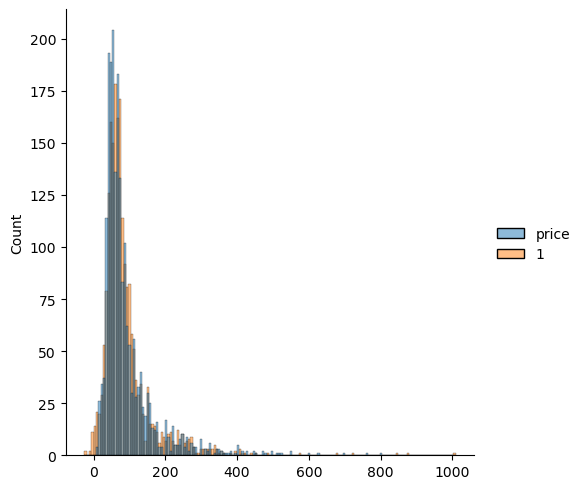

In [464]:
sns.displot((y_test, y_pred))
plt.show()

Use K Fold cross validation to measure accuracy of our LinearRegression model

In [465]:
cross_val_score(LinearRegression(), X, y, cv=3)

array([-1.13340438e+16, -7.27933879e-01, -1.87890492e+00])

In [466]:
scores = cross_val_score(LinearRegression(), X, y, cv=3, scoring='neg_mean_squared_error')
mse_scores = -scores

In [467]:
mse_scores

array([7.25933780e+19, 1.54341580e+04, 1.89411607e+04])